In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Python_rnw\one\mathematics\household_dataset.csv")

print(df.head())
print(df.info())

  Household_ID  Age_of_Household_Head  Household_Income Education_Level  \
0        H1000                     63             28419        Graduate   
1        H1001                     53             55015        Graduate   
2        H1002                     39            127096       Secondary   
3        H1003                     67            112059         Primary   
4        H1004                     32            115687       Secondary   

   Family_Size Owns_House Urban_Rural  
0            5        Yes       Urban  
1            9        Yes       Rural  
2            6         No       Urban  
3            3         No       Urban  
4            5        Yes       Urban  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Household_ID           150 non-null    object
 1   Age_of_Household_Head  150 non-null    int64 
 

In [2]:
#1. Type of Data: Categorical vs Numerical 
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['int64','float64']).columns

print("Categorical:", categorical.tolist())
print("Numerical:", numerical.tolist())

Categorical: ['Household_ID', 'Education_Level', 'Owns_House', 'Urban_Rural']
Numerical: ['Age_of_Household_Head', 'Household_Income', 'Family_Size']


In [3]:
#2. Central Tendency
income = df['Household_Income']
age = df['Age_of_Household_Head']

print("Income Mean:", income.mean())
print("Income Median:", income.median())
print("Income Mode:", income.mode()[0])

print("Age Mean:", age.mean())
print("Age Median:", age.median())
print("Age Mode:", age.mode()[0])

Income Mean: 83517.71333333333
Income Median: 91309.0
Income Mode: 7693
Age Mean: 48.7
Age Median: 48.0
Age Mode: 48


In [4]:
# 3. Measures of Dispersion

range_income = income.max() - income.min()
variance_income = income.var()
std_income = income.std()

Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3 - Q1

print("Range:", range_income)
print("Variance:", variance_income)
print("Std Dev:", std_income)
print("IQR:", IQR)

Range: 141253
Variance: 1818025981.1588814
Std Dev: 42638.31588089381
IQR: 75935.5


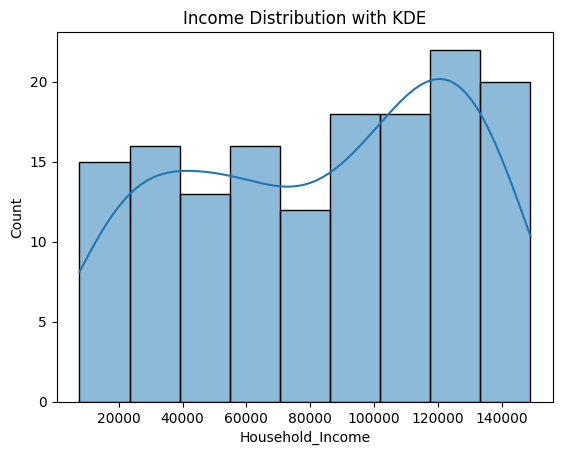

In [5]:
#4. Distribution Analysis
# Histogram + Gaussian Fit:

from scipy.stats import norm

sns.histplot(income, kde=True)
plt.title("Income Distribution with KDE")
plt.show()


In [6]:
#Skewness & Kurtosis:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(income))
print("Kurtosis:", kurtosis(income))

Skewness: -0.21918914043689458
Kurtosis: -1.2756517344897114


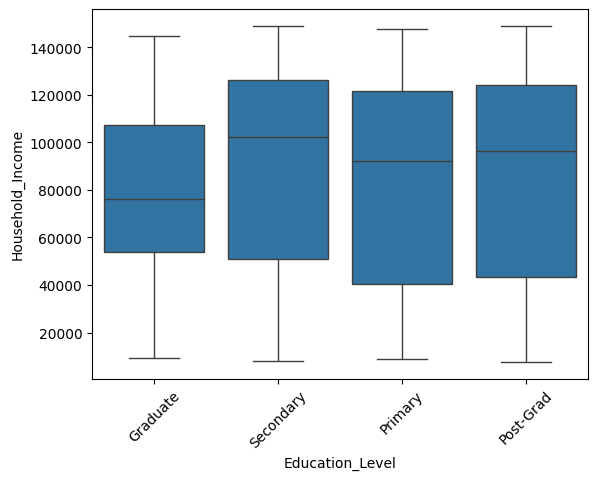

In [7]:
#5. Data Categorization Visualizations
#Boxplot: Income vs Education Level

sns.boxplot(x="Education_Level", y="Household_Income", data=df)
plt.xticks(rotation=45)
plt.show()

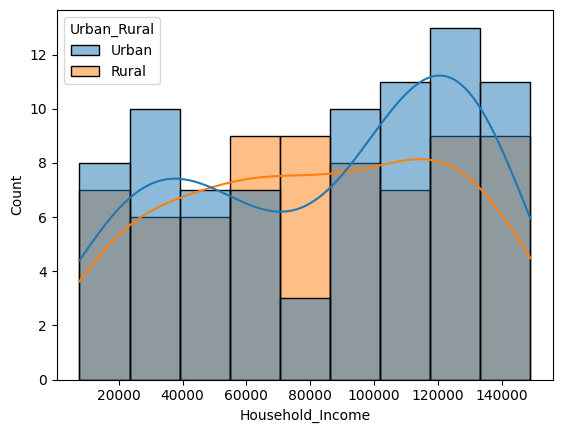

In [8]:
#Histogram + KDE: Urban vs Rural Income
sns.histplot(data=df, x="Household_Income", hue="Urban_Rural", kde=True)
plt.show()

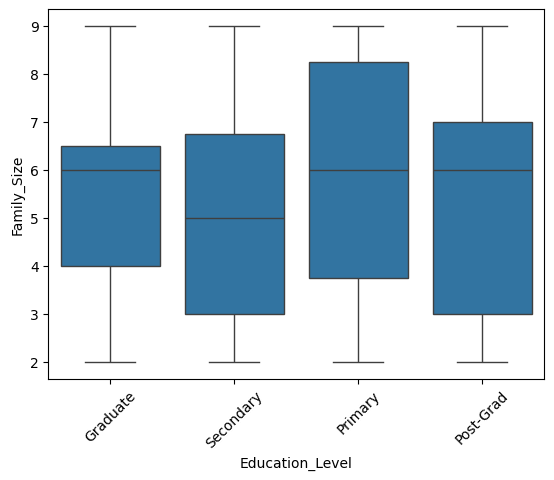

In [9]:
#Boxplot: Family Size vs Education
sns.boxplot(x="Education_Level", y="Family_Size", data=df)
plt.xticks(rotation=45)
plt.show()

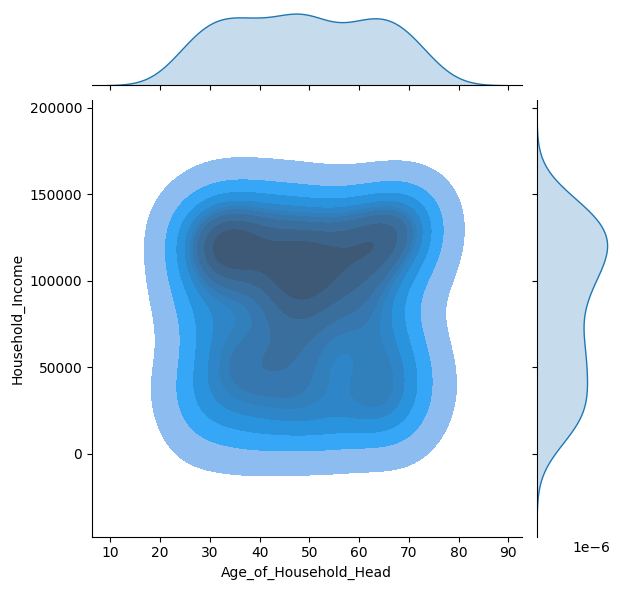

In [10]:
#Age vs Income Distribution (KDE)
sns.jointplot(x="Age_of_Household_Head", y="Household_Income", 
              data=df, kind="kde", fill=True)
